In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [4]:
# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [5]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

In [6]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

============== 1/16 ==============
epoch:0 | 0.117 - 0.106
epoch:1 | 0.097 - 0.108


..\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.145
epoch:3 | 0.097 - 0.151
epoch:4 | 0.097 - 0.167
epoch:5 | 0.097 - 0.178
epoch:6 | 0.097 - 0.197
epoch:7 | 0.097 - 0.209
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.251
epoch:10 | 0.097 - 0.274
epoch:11 | 0.097 - 0.297
epoch:12 | 0.097 - 0.31
epoch:13 | 0.097 - 0.306
epoch:14 | 0.097 - 0.333
epoch:15 | 0.097 - 0.357
epoch:16 | 0.097 - 0.356
epoch:17 | 0.097 - 0.4
epoch:18 | 0.097 - 0.407


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.419
============== 2/16 ==============
epoch:0 | 0.094 - 0.106
epoch:1 | 0.097 - 0.107


..\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.158
epoch:3 | 0.097 - 0.166
epoch:4 | 0.097 - 0.192
epoch:5 | 0.097 - 0.213
epoch:6 | 0.097 - 0.238
epoch:7 | 0.097 - 0.26
epoch:8 | 0.097 - 0.275
epoch:9 | 0.097 - 0.297
epoch:10 | 0.097 - 0.312
epoch:11 | 0.097 - 0.33
epoch:12 | 0.097 - 0.349
epoch:13 | 0.097 - 0.36
epoch:14 | 0.097 - 0.381
epoch:15 | 0.097 - 0.396
epoch:16 | 0.097 - 0.407
epoch:17 | 0.097 - 0.43


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.446
epoch:19 | 0.097 - 0.461
============== 3/16 ==============
epoch:0 | 0.148 - 0.136


..\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


epoch:1 | 0.321 - 0.16
epoch:2 | 0.49 - 0.196
epoch:3 | 0.581 - 0.238
epoch:4 | 0.626 - 0.277
epoch:5 | 0.69 - 0.314
epoch:6 | 0.727 - 0.347
epoch:7 | 0.766 - 0.379
epoch:8 | 0.804 - 0.418
epoch:9 | 0.842 - 0.447
epoch:10 | 0.87 - 0.474
epoch:11 | 0.895 - 0.497
epoch:12 | 0.903 - 0.527
epoch:13 | 0.917 - 0.544
epoch:14 | 0.93 - 0.576
epoch:15 | 0.948 - 0.595
epoch:16 | 0.953 - 0.622
epoch:17 | 0.967 - 0.645


No handles with labels found to put in legend.


epoch:18 | 0.971 - 0.658
epoch:19 | 0.973 - 0.679
============== 4/16 ==============
epoch:0 | 0.124 - 0.114
epoch:1 | 0.362 - 0.136
epoch:2 | 0.479 - 0.166
epoch:3 | 0.576 - 0.226
epoch:4 | 0.617 - 0.319
epoch:5 | 0.653 - 0.378
epoch:6 | 0.692 - 0.434
epoch:7 | 0.738 - 0.491
epoch:8 | 0.742 - 0.521
epoch:9 | 0.778 - 0.561
epoch:10 | 0.787 - 0.596
epoch:11 | 0.805 - 0.627
epoch:12 | 0.817 - 0.655
epoch:13 | 0.83 - 0.677
epoch:14 | 0.844 - 0.696
epoch:15 | 0.864 - 0.713
epoch:16 | 0.853 - 0.736
epoch:17 | 0.868 - 0.745
epoch:18 | 0.88 - 0.762


No handles with labels found to put in legend.


epoch:19 | 0.893 - 0.768
============== 5/16 ==============
epoch:0 | 0.11 - 0.132
epoch:1 | 0.122 - 0.118
epoch:2 | 0.139 - 0.231
epoch:3 | 0.143 - 0.367
epoch:4 | 0.14 - 0.472
epoch:5 | 0.16 - 0.569
epoch:6 | 0.169 - 0.629
epoch:7 | 0.184 - 0.681
epoch:8 | 0.2 - 0.725
epoch:9 | 0.208 - 0.761
epoch:10 | 0.223 - 0.783
epoch:11 | 0.235 - 0.801
epoch:12 | 0.236 - 0.806
epoch:13 | 0.234 - 0.813
epoch:14 | 0.234 - 0.825
epoch:15 | 0.237 - 0.838
epoch:16 | 0.243 - 0.854
epoch:17 | 0.251 - 0.856
epoch:18 | 0.254 - 0.873
epoch:19 | 0.247 - 0.878


No handles with labels found to put in legend.


============== 6/16 ==============
epoch:0 | 0.108 - 0.127
epoch:1 | 0.115 - 0.246
epoch:2 | 0.114 - 0.475
epoch:3 | 0.106 - 0.615
epoch:4 | 0.116 - 0.673
epoch:5 | 0.116 - 0.723
epoch:6 | 0.116 - 0.752
epoch:7 | 0.116 - 0.801
epoch:8 | 0.116 - 0.819
epoch:9 | 0.116 - 0.841
epoch:10 | 0.116 - 0.858
epoch:11 | 0.116 - 0.874
epoch:12 | 0.116 - 0.878
epoch:13 | 0.116 - 0.891
epoch:14 | 0.116 - 0.902
epoch:15 | 0.116 - 0.908
epoch:16 | 0.116 - 0.917
epoch:17 | 0.116 - 0.925


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.93
epoch:19 | 0.116 - 0.938
============== 7/16 ==============
epoch:0 | 0.105 - 0.081
epoch:1 | 0.117 - 0.338
epoch:2 | 0.117 - 0.625
epoch:3 | 0.117 - 0.722
epoch:4 | 0.116 - 0.774
epoch:5 | 0.116 - 0.807
epoch:6 | 0.117 - 0.836
epoch:7 | 0.117 - 0.859
epoch:8 | 0.116 - 0.887
epoch:9 | 0.116 - 0.903
epoch:10 | 0.117 - 0.926
epoch:11 | 0.117 - 0.938
epoch:12 | 0.117 - 0.952
epoch:13 | 0.117 - 0.958
epoch:14 | 0.117 - 0.963
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.979
epoch:17 | 0.116 - 0.981
epoch:18 | 0.116 - 0.984


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.987
============== 8/16 ==============
epoch:0 | 0.105 - 0.101
epoch:1 | 0.117 - 0.378
epoch:2 | 0.117 - 0.651
epoch:3 | 0.117 - 0.757
epoch:4 | 0.117 - 0.807
epoch:5 | 0.116 - 0.862
epoch:6 | 0.117 - 0.903
epoch:7 | 0.116 - 0.927
epoch:8 | 0.116 - 0.963
epoch:9 | 0.116 - 0.973
epoch:10 | 0.117 - 0.979
epoch:11 | 0.117 - 0.99
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998
epoch:19 | 0.117 - 0.998


No handles with labels found to put in legend.


============== 9/16 ==============
epoch:0 | 0.1 - 0.141
epoch:1 | 0.117 - 0.555
epoch:2 | 0.116 - 0.789
epoch:3 | 0.117 - 0.844
epoch:4 | 0.117 - 0.901
epoch:5 | 0.117 - 0.938
epoch:6 | 0.117 - 0.968
epoch:7 | 0.117 - 0.979
epoch:8 | 0.117 - 0.984
epoch:9 | 0.117 - 0.994
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.172
epoch:1 | 0.116 - 0.531
epoch:2 | 0.116 - 0.628
epoch:3 | 0.116 - 0.775
epoch:4 | 0.116 - 0.847
epoch:5 | 0.116 - 0.944
epoch:6 | 0.116 - 0.957
epoch:7 | 0.116 - 0.961
epoch:8 | 0.116 - 0.985
epoch:9 | 0.116 - 0.923
epoch:10 | 0.116 - 0.98
epoch:11 | 0.116 - 0.989
epoch:12 | 0.116 - 0.994
epoch:13 | 0.116 - 0.995
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.996
epoch:17 | 0.116 - 0.997
epoch:18 | 0.116 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 11/16 ==============
epoch:0 | 0.117 - 0.237
epoch:1 | 0.117 - 0.643
epoch:2 | 0.117 - 0.759
epoch:3 | 0.117 - 0.787
epoch:4 | 0.117 - 0.825
epoch:5 | 0.117 - 0.84
epoch:6 | 0.117 - 0.878
epoch:7 | 0.117 - 0.882
epoch:8 | 0.117 - 0.892
epoch:9 | 0.117 - 0.877
epoch:10 | 0.117 - 0.892
epoch:11 | 0.117 - 0.897
epoch:12 | 0.117 - 0.899
epoch:13 | 0.116 - 0.898
epoch:14 | 0.116 - 0.9
epoch:15 | 0.116 - 0.9
epoch:16 | 0.116 - 0.907
epoch:17 | 0.116 - 0.98


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.988
epoch:19 | 0.117 - 0.992
============== 12/16 ==============
epoch:0 | 0.097 - 0.177
epoch:1 | 0.116 - 0.504
epoch:2 | 0.116 - 0.576
epoch:3 | 0.116 - 0.617
epoch:4 | 0.116 - 0.673
epoch:5 | 0.116 - 0.685
epoch:6 | 0.116 - 0.686
epoch:7 | 0.116 - 0.359
epoch:8 | 0.116 - 0.691
epoch:9 | 0.116 - 0.7
epoch:10 | 0.116 - 0.709
epoch:11 | 0.116 - 0.711
epoch:12 | 0.116 - 0.712
epoch:13 | 0.116 - 0.715
epoch:14 | 0.116 - 0.716
epoch:15 | 0.116 - 0.71
epoch:16 | 0.116 - 0.715
epoch:17 | 0.117 - 0.714


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.71
epoch:19 | 0.117 - 0.715
============== 13/16 ==============
epoch:0 | 0.105 - 0.12
epoch:1 | 0.116 - 0.336
epoch:2 | 0.116 - 0.488
epoch:3 | 0.116 - 0.571
epoch:4 | 0.116 - 0.524
epoch:5 | 0.116 - 0.578
epoch:6 | 0.116 - 0.588
epoch:7 | 0.116 - 0.581
epoch:8 | 0.116 - 0.657
epoch:9 | 0.117 - 0.697
epoch:10 | 0.117 - 0.686
epoch:11 | 0.117 - 0.691
epoch:12 | 0.117 - 0.674
epoch:13 | 0.117 - 0.631
epoch:14 | 0.117 - 0.702
epoch:15 | 0.117 - 0.695
epoch:16 | 0.117 - 0.611
epoch:17 | 0.117 - 0.676


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.705
epoch:19 | 0.117 - 0.703
============== 14/16 ==============
epoch:0 | 0.117 - 0.118
epoch:1 | 0.105 - 0.451
epoch:2 | 0.105 - 0.497
epoch:3 | 0.117 - 0.444
epoch:4 | 0.117 - 0.511
epoch:5 | 0.117 - 0.535
epoch:6 | 0.117 - 0.57
epoch:7 | 0.117 - 0.585
epoch:8 | 0.117 - 0.587
epoch:9 | 0.117 - 0.581
epoch:10 | 0.117 - 0.6
epoch:11 | 0.117 - 0.602
epoch:12 | 0.117 - 0.607
epoch:13 | 0.117 - 0.615
epoch:14 | 0.117 - 0.617
epoch:15 | 0.117 - 0.607
epoch:16 | 0.117 - 0.607
epoch:17 | 0.117 - 0.616
epoch:18 | 0.117 - 0.605


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.614
============== 15/16 ==============
epoch:0 | 0.116 - 0.155
epoch:1 | 0.117 - 0.391
epoch:2 | 0.116 - 0.43
epoch:3 | 0.116 - 0.488
epoch:4 | 0.116 - 0.507
epoch:5 | 0.116 - 0.487
epoch:6 | 0.116 - 0.498
epoch:7 | 0.116 - 0.502
epoch:8 | 0.116 - 0.507
epoch:9 | 0.116 - 0.5
epoch:10 | 0.116 - 0.503
epoch:11 | 0.116 - 0.522
epoch:12 | 0.116 - 0.521
epoch:13 | 0.116 - 0.488
epoch:14 | 0.116 - 0.526
epoch:15 | 0.116 - 0.527
epoch:16 | 0.116 - 0.523
epoch:17 | 0.116 - 0.526
epoch:18 | 0.116 - 0.525


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.526
============== 16/16 ==============
epoch:0 | 0.097 - 0.098
epoch:1 | 0.097 - 0.267
epoch:2 | 0.117 - 0.386
epoch:3 | 0.117 - 0.349
epoch:4 | 0.116 - 0.402
epoch:5 | 0.116 - 0.415
epoch:6 | 0.116 - 0.412
epoch:7 | 0.116 - 0.413
epoch:8 | 0.116 - 0.412
epoch:9 | 0.116 - 0.43
epoch:10 | 0.116 - 0.423
epoch:11 | 0.116 - 0.431
epoch:12 | 0.116 - 0.377
epoch:13 | 0.116 - 0.413
epoch:14 | 0.116 - 0.427
epoch:15 | 0.116 - 0.429
epoch:16 | 0.116 - 0.431
epoch:17 | 0.117 - 0.428
epoch:18 | 0.117 - 0.432
epoch:19 | 0.117 - 0.432


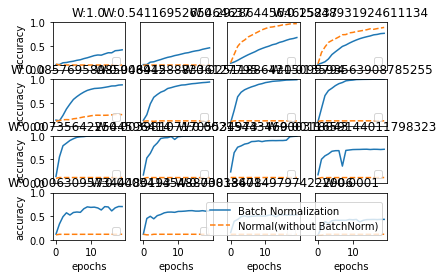

In [7]:
for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()